# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [78]:
# FYI to reader - utilizing sklearn version 0.18
import sklearn
sklearn.__version__

'0.18'

In [79]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [80]:
# Display a description of the dataset
pd.options.display.float_format = '{:,.2f}'.format
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,"12,000.30","5,796.27","7,951.28","3,071.93","2,881.49","1,524.87"
std,"12,647.33","7,380.38","9,503.16","4,854.67","4,767.85","2,820.11"
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,"3,127.75","1,533.00","2,153.00",742.25,256.75,408.25
50%,"8,504.00","3,627.00","4,755.50","1,526.00",816.50,965.50
75%,"16,933.75","7,190.25","10,655.75","3,554.25","3,922.00","1,820.25"
max,"112,151.00","73,498.00","92,780.00","60,869.00","40,827.00","47,943.00"


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [81]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,201,300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,4484,14399,24708,3549,14235,1681
2,16448,6243,6360,824,2662,2005


In [82]:
# View sum of monetary units per sample
samples.sum(axis=1)

0    33266
1    63056
2    34542
dtype: int64

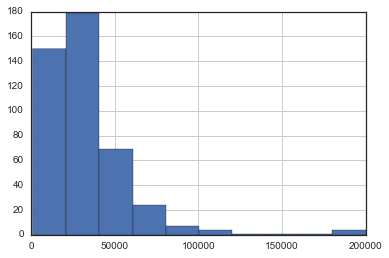

In [83]:
# Show histogram for total spend by each customer
_ = data.sum(axis=1).hist(figsize=(6,4))

<div style="background-color:#fff1e0;">Note to self: Looks like we'll eventually need to remove some outliers.</div>

In [84]:
# create comparison table for samples values and central tendency values of data
# round values to nearest monetary unit to make easier to read
pd.options.display.float_format = '{:,.0f}'.format
compare = pd.DataFrame({"means": data.mean(), "medians": data.median(), \
              "sample 1": samples.iloc[0], "sample 2": samples.iloc[1], \
              "sample 3": samples.iloc[2]})
compare.loc["Total"] = compare.sum()
display(compare)

,means,medians,sample 1,sample 2,sample 3
Fresh,"12,000","8,504","7,057","4,484","16,448"
Milk,"5,796","3,627","9,810","14,399","6,243"
Grocery,"7,951","4,756","9,568","24,708","6,360"
Frozen,"3,072","1,526","1,762","3,549",824
Detergents_Paper,"2,881",816,"3,293","14,235","2,662"
Delicatessen,"1,525",966,"1,776","1,681","2,005"
Total,"33,226","20,194","33,266","63,056","34,542"


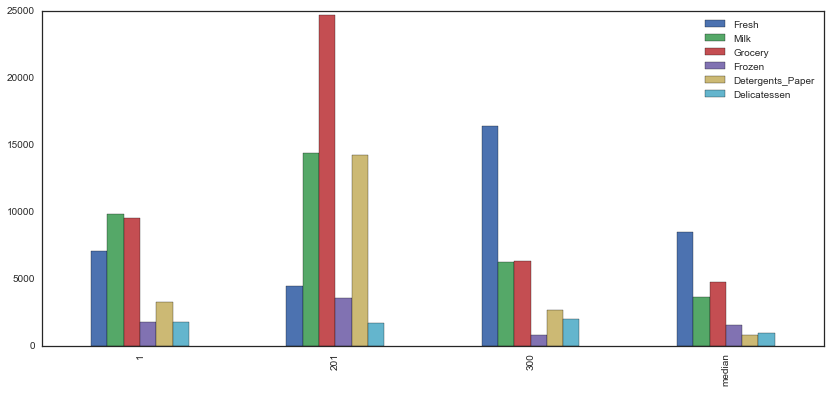

In [85]:
# compare selected sample values to medians for that cateogory
# thanks to Udacity reviewer for idea on this code snippet!
import seaborn as sns
sns.set_style(style='white')
samples_bar = samples.append(compare['medians'][0:6])
samples_bar.index = indices + ['median']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**  
<div style="background-color:#fff1e0;">
1. The first observation I've chosen (index=1) has a more even distribution across product categories than the other two. Total spend by this customer is equal to mean total spend by all customer and greater than the median. This customer spends relatively more than the average customer on Milk, Grocery, Frozen, and Degertents_Paper but less than average on Fresh product. This customer could be quick-mart or a small concenvience shop that sells an assortment of goods.  
<br><br>
2. The second observations (index=201) could be a large retailer like Target. At first glance, I assumed it was a high volume cafe due to it's consuption of milk and detergent/paper goods purchases. However, the fact that it consumes such a high volume of grocery items leads me to believe otherwise. Total spend by this customer is considerably higher than the mean and median total spend by all customer. This customer spends relatively more than the average customer on everything but Fresh product.  
<br><br>
3. The third observation (index=300) is probably a health-focused restaurant like Chipolte. They purchase a disproportionate amount of fresh goods. Total spend by this customer is slightly higher then the mean total spend by all customer and greater than the median. This customer spends relatively more than the average customer on everything but Frozen product.</div>

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [86]:
# import required libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, make_scorer

def predictability(the_feature):
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(the_feature, axis=1)
    new_data["constant"] = [1] * 440
    target = data[the_feature]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.33, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # score = r2_score(y_test, regressor.predict(X_test))
    r2_scorer = make_scorer(r2_score)
    score = cross_val_score(regressor, new_data, target, scoring=r2_scorer, cv=5).mean()

    print "The dropped feature is: " + the_feature + ", and the R^2 = " + str(score)

for feature in data.columns:
    predictability(feature)

The dropped feature is: Fresh, and the R^2 = -0.825242705127
The dropped feature is: Milk, and the R^2 = 0.270023736422
The dropped feature is: Grocery, and the R^2 = 0.584237085033
The dropped feature is: Frozen, and the R^2 = -3.63880586964
The dropped feature is: Detergents_Paper, and the R^2 = 0.588722330332
The dropped feature is: Delicatessen, and the R^2 = -6.75300091917


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**  
<div style="background-color:#fff1e0;">I attempted to predict the feature "Detergents_Paper" (although I did the calculations for all features). The reported R^2 is ≈0.60 (depending upon the # of cv's) meaning that the other variables explain only ≈60% of the variation of the Detergents_Paper data around its mean. This is counter to what I had anticipated. I expected that there would be consistency in spending patterns of establishments that would show much stronger correlation. As I show below, this confusion may be a result of the positive skew present in each of the spending categories. Given this R^2, I imagine that this, and all other features, are necessary for identifying customers' spending habits. However, it does give me some intuition that the milk, grocery, and Detergents_Paper categories are related.
<br><br>
It also appears, seeing the negative / less than -1 values for Fresh, Frozen, and Delicatessen that predicting these features from the other data points is not possible.  
<br><br>
Source: http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit</div>

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

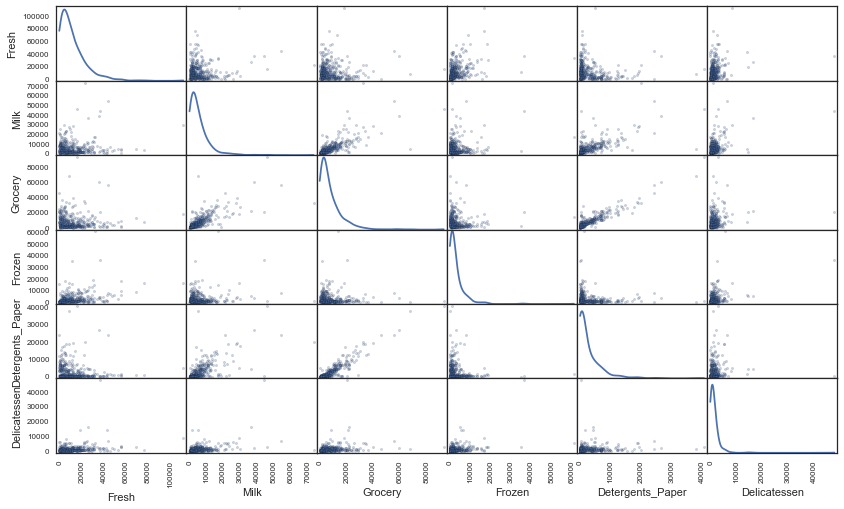

In [87]:
# Produce a scatter matrix for each pair of features in the data
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [88]:
# I want to quantify the relationship between Grocery and Detergents_Paper
pd.options.display.float_format = '{:,.2f}'.format
data[["Grocery", "Detergents_Paper"]].corr()

,Grocery,Detergents_Paper
Grocery,1.00,0.92
Detergents_Paper,0.92,1.00


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  
<div style="background-color:#fff1e0;">At first glance, it looks like Grocery and Detergents_Paper are highly correlated. Indeed, their Pearson correlation is 0.92. That would mean that we can reduce the dimensionality of the problem while maintaining performance of predictions (or clusters) while dropping either the Grocery or Detergent_Paper feature from our dataset.</div>

<div style="background-color:#fff1e0;">However, if that were true, should we not have seen a better R^2 with our decision tree classifier when attempting to model the variability in the Detergents_Paper data? Perhaps there are outliers in our data that have reduced the R^2 in our decision tree model... Or could it also be the case that the positive skew in all of the variables are driving the lower than expected R^2 and we need to normalize our features?</div>

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

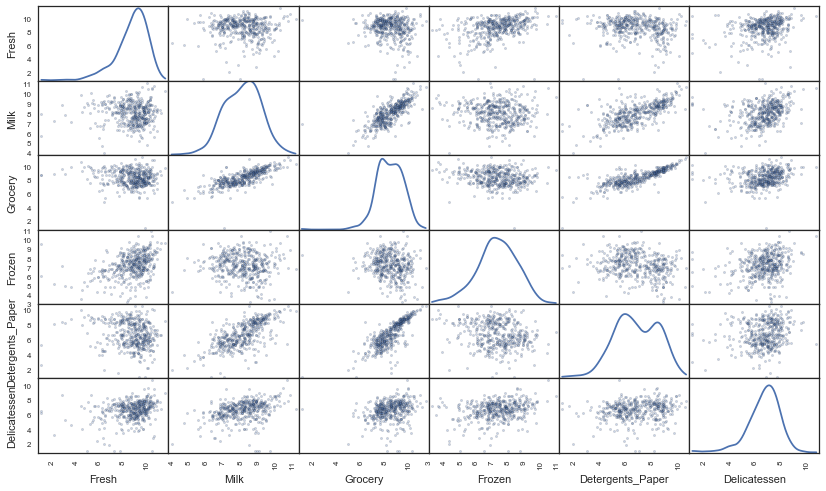

In [89]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
_ = scatter_matrix(np.log(data), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [90]:
# Display the log-transformed sample data
pd.options.display.float_format = '{:,.2f}'.format
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.86,9.19,9.17,7.47,8.10,7.48
1,8.41,9.57,10.11,8.17,9.56,7.43
2,9.71,8.74,8.76,6.71,7.89,7.60


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

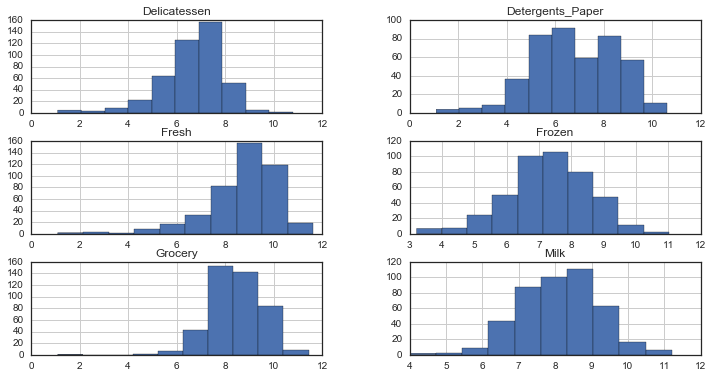

In [91]:
# Plot histogram for each normalized feature
_ = log_data.hist(figsize=(12,6))

In [98]:
from operator import itemgetter
from collections import Counter

# For each feature find the data points with extreme high or low values
pd.options.display.float_format = '{:,.2f}'.format
catch = [] # to identify repeat outlier values

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    outies = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # Display the outliers
    print "{} Data points considered outliers for the feature '{}':".format(len(outies), feature)
    display(outies)
    
    # capture outliers in array to count repeats
    for i in outies.index.values:
        catch.append(i)
    
# OPTIONAL: Select the indices for data points you wish to remove
# outliers  = [] # test what happens when not removing any outliers
outlier_count_dict = sorted(Counter(catch).items(), key=itemgetter(1), reverse=True)
print "Count of outlier index occurances: {}".format(outlier_count_dict)

# (154, 3), (128, 2), (65, 2), (66, 2), (75, 2)
outliers  = [65, 66, 75, 95, 128, 154, 338]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

16 Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.44,9.95,10.73,3.58,10.10,7.26
66,2.20,7.34,8.91,5.16,8.15,3.30
81,5.39,9.16,9.58,5.65,8.96,5.05
95,1.10,7.98,8.74,6.09,5.41,6.56
96,3.14,7.87,9.00,4.98,8.26,5.38
128,4.94,9.09,8.25,4.96,6.97,1.10
171,5.30,10.16,9.89,6.48,9.08,8.74
193,5.19,8.16,9.92,6.87,8.63,6.50
218,2.89,8.92,9.63,7.16,8.48,8.76
304,5.08,8.92,10.12,6.42,9.37,7.79


4 Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.04,11.21,10.38,6.89,9.91,6.81
98,6.22,4.72,6.66,6.80,4.03,4.88
154,6.43,4.01,4.92,4.32,1.95,2.08
356,10.03,4.90,5.38,8.06,2.20,6.31


2 Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
154,6.43,4.01,4.92,4.32,1.95,2.08


10 Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.43,9.66,9.72,3.50,8.85,6.07
57,8.60,9.20,9.26,3.64,8.93,7.16
65,4.44,9.95,10.73,3.58,10.10,7.26
145,10.00,9.03,10.46,3.74,9.44,8.40
175,7.76,8.97,9.38,3.95,8.34,7.44
264,6.98,9.18,9.65,4.11,8.70,7.14
325,10.40,9.73,9.52,11.02,7.15,8.63
420,8.40,8.57,9.49,3.22,8.83,7.24
429,9.06,7.47,8.18,3.85,4.43,7.82
439,7.93,7.44,7.83,4.17,6.17,3.95


2 Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
161,9.43,6.29,5.65,7.00,1.10,7.71


14 Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.20,7.34,8.91,5.16,8.15,3.30
109,7.25,9.72,10.27,6.51,6.73,1.10
128,4.94,9.09,8.25,4.96,6.97,1.10
137,8.03,9.00,9.02,6.49,6.58,3.58
142,10.52,8.88,9.02,8.00,3.00,1.10
154,6.43,4.01,4.92,4.32,1.95,2.08
183,10.51,10.69,9.91,10.51,5.48,10.78
184,5.79,6.82,8.46,4.30,5.81,2.40
187,7.80,8.99,9.19,8.74,8.15,1.10
203,6.37,6.53,7.70,6.15,6.86,2.89


Count of outlier index occurances: [(154, 3), (128, 2), (65, 2), (66, 2), (75, 2), (193, 1), (264, 1), (137, 1), (142, 1), (145, 1), (412, 1), (285, 1), (161, 1), (420, 1), (38, 1), (171, 1), (429, 1), (175, 1), (304, 1), (305, 1), (439, 1), (184, 1), (57, 1), (187, 1), (203, 1), (325, 1), (289, 1), (81, 1), (338, 1), (86, 1), (343, 1), (218, 1), (95, 1), (96, 1), (353, 1), (98, 1), (355, 1), (356, 1), (357, 1), (233, 1), (109, 1), (183, 1)]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  
<div style="background-color:#fff1e0;">I'm considering seven data points as outliers. Index=66 is the first for it's significant deviation in the Delicatessen category. Index=75 is the second. It's defined as an outlier in the 'Grocery' category and, as seen in the histogram above, it is very far from the other data points perhaps indicating a data entry error. Index=154 is identified three times in 'Milk', 'Grocery', and 'Delicatessen' as an outlier. This point may represent a group of it's own and could potentially distort the way our clusters are formed. Additionally, I am removing Index=95 and Index=338 as they appear as outliers in what is perhaps our most skewed category, Fresh. Lastly, Index=65 and Index=128 occur as outliers in more than one category and as such are also being removed.
<br><br>
I will later explore the impact to our customer segments when including / excluding these identified outliers.</div>

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

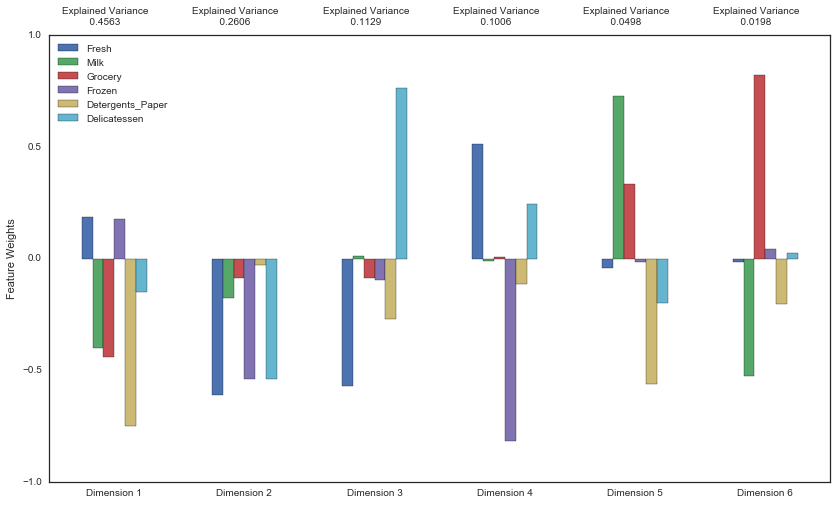

In [99]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [100]:
print pca_results['Explained Variance'].cumsum()

Dimension 1   0.46
Dimension 2   0.72
Dimension 3   0.83
Dimension 4   0.93
Dimension 5   0.98
Dimension 6   1.00
Name: Explained Variance, dtype: float64


**Answer:**  
<div style="background-color:#fff1e0;">The first and second principle component explain, in total, 71.31% of the variance within the data. The first four principle components explain, in total, 93.27% of the variance within the data. Using the visualization above, we can summarize what the first four dimensions represent in terms of customer spending:</div>
- **Dimension 1**: This component is strongly correlated with customer spending on Detergents_Paper and to a lesser extent with spending on Grocery and Milk. This suggests that the first component changes with changes in customer spending on the Detergent_Paper category as well as the Grocery and Milk cateogies and that changes in these categories tend to move together in the same direction. It's not hard to imagine that this type of spending pattern could be associated with the hospitality industry. Hotels use lots of toilet paper & printing paper... but also probably use an relatively enormous amount of detergent repeatedly cleaning all the bed sheets. Admittedly, at the same time this may represent a large retail that buys / sells a large variety of products.
- **Dimension 2**: This component can be viewed as a measure of customer spending on the mixture of Fresh, Delicatessen, and Frozen categories. As the Udacity coach generously hypothsized for me, since these components are all associated with cuisine this dimension may be associated with restaurant establishments. We see that it has a strong correlation with spending on the Fresh category and to a lesser extend with spending on the Delicatessen and Frozen categories.
- **Dimension 3**: Now things get interesting. This component is correlated with variations in spending on the Fresh cateogory and with variations in spending on the Delicatessen category, but in the opposite direction. That is counter to what dimension number two is telling us. However, this brings back to mind the exerise where we intuitively classified the establishment types... and one of those types was a healthier driven food establishment like Chipolte where I would expect Fresh spending to be negatively correlated with prepackaged Delicatessen items. So, perhaps, this represents a subset of dimension 2 which was identified as potentially representing restaurant-type establishments.  
- **Dimension 4**: This component doesn't explain a lot of variation within our data, but it appears to have a strong correlation with spending on the Frozen category. I'm not sure we'd deticate an entire category to this, but I'm sure ice-cream trucks or Diary Queens or Baskin Robins probably spend a disproportionate amount of their cost on frozen items. 

<div style="background-color:#fff1e0;">Source: https://onlinecourses.science.psu.edu/stat505/node/54; http://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers; http://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers</div>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [101]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.77,-0.83,0.16,-0.05,0.12,-0.21
1,-3.39,-1.09,-0.16,-1.03,-0.08,0.11
2,-1.25,-0.88,-0.07,1.06,-0.27,-0.31


<div style="background-color:#fff1e0;">Super interesting. I interpreted dimension 1 as being associated with higher spending on Detergents_Paper as well as the Grocery and Milk categories... and in the table above index = 1, which has a relatively high absolute value for dimension 1, I had identified as a larger retailer like Target.</div>

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [102]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [103]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.77,-0.83
1,-3.39,-1.09
2,-1.25,-0.88


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  
<div style="background-color:#fff1e0;">Despite widespread use of K-Means in blogs, tutorials, intro classes and the like, I am chosing to use Gaussian Mixture Model(GMM) for our clustering problem for three main reasons.  
<br><br>
K-means will be computationally more efficient than GMM with data that has large number of observations and features. As such it would train and predict (and cost less $) at a faster rate. However, we do not have a very large dataset on our hands, in terms of either observations or features. Despite the computational trade-off, the next two reasons push the needle toward using the GMM for this clustering problem. 
<br><br>
The second reason is the availability of different covariance types with GMM. K-Means assumes a spherical covariance type, but GMM can use spherical, full, diag, or tied. While we've removed some outliers from the data, normalized it, and reduced it's dimensionality, we still are uncertain about the shape of the clusters or the number of the clusters. Thus it will be helpful to have the flexibility of GMM. 
<br><br>
Third, K-Means assigns one and only group to each point. On the other hand, GMM will give us a probability of a point belonging to a certain group. When thinking about the diversity of wholesale establishments, it's sensible to use an algorithm that allows us to explore the degree to which a data point may or may not belong to a group. K-Means would be better if we had a more clear idea of the groups we were looking for.  
<br><br>
Source: https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm; http://scikit-learn.org/stable/modules/mixture.html
</div>

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [104]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

# These lines are used to create visualization in Part 2
clusterer = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_

# This function is to analyze silhouette scores across different # of clusters
def calculate_s_score(clusters):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    # full, spherical, diag, tied
    clusterer = mixture.GaussianMixture(n_components=clusters, covariance_type='full',\
                                        random_state=0).fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    return score

In [105]:
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

In [108]:
# calculate silhouette scores for 2-20 clusters and visualize results
s_scores = []
for i in range(2,21):
    score = calculate_s_score(i)
    s_scores.append(score)
print s_scores

[0.42502768319949341, 0.3199516367916253, 0.284318308600985, 0.33406420770719714, 0.30088160467533293, 0.31682570814807137, 0.32239626296011875, 0.32167273625103338, 0.32124558231070621, 0.32413034013645359, 0.30178881824729981, 0.28427379415263054, 0.28422339580685901, 0.31737008722492266, 0.29895711805861969, 0.29063700204374382, 0.29672535370361403, 0.22833557286593742, 0.23567092914625667]


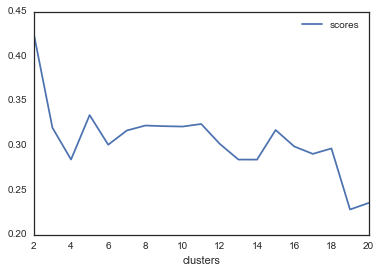

In [109]:
pd.DataFrame({"clusters": range(2,21), "scores": s_scores}).plot(x="clusters", y="scores")

<div style="background-color:#fff1e0;">For reference, this is from the sklearn documentation page on silhouette scores: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.</div>

Resource: http://stackoverflow.com/questions/28438855/mixture-of-gaussians-using-scikit-learn-mixture; http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  
<div style="background-color:#fff1e0;">I calculated the silhouette scores for each cluster number between 2 and 20 inclusive. As shown in my plot above, 2 clusters gives us the best silhouette score. Interestingly, if I had chosen not to remove any outliers the best silhouette score would be on 3 clusters rather than 2.</div>

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

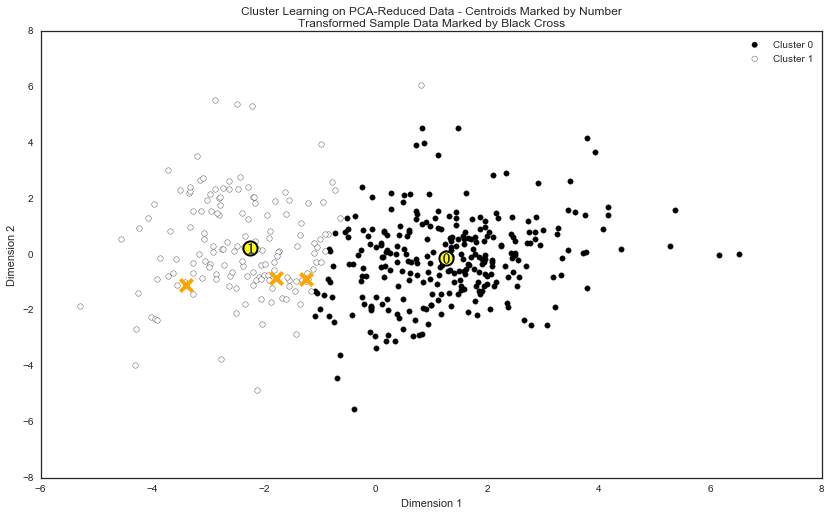

In [110]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [111]:
pd.options.display.float_format = '{:,.0f}'.format

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,"9,103","2,116","2,745","2,034",356,723
Segment 1,"3,777","8,036","12,477",889,"4,889",990


In [112]:
# build table for statistical comparison of category values
pd.options.display.float_format = '{:,.0f}'.format
true_centers.loc["cat_means"] = compare["means"].values[:-1]
true_centers.loc["cat_medians"] = compare["medians"].values[:-1]
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,"9,103","2,116","2,745","2,034",356,723
Segment 1,"3,777","8,036","12,477",889,"4,889",990
cat_means,"12,000","5,796","7,951","3,072","2,881","1,525"
cat_medians,"8,504","3,627","4,756","1,526",816,966


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  
<div style="background-color:#fff1e0;">Segment 1 in the table above shows strong spending on Grocery, Milk, and Detergent_Paper (each of these sit far above the median spend in their respective categories) and weaker spending on Fresh, Frozen, and Delicatessen (each of these sit well below the median spend in their respective categories). This type of establishment could be identified as grocery stores or bigger retailers who obviously purchase lots of grocery items, but still spend a healthy amount on each of the other categoies. A grocery store with a deli inside would not purchase deli items, rather, they would purchase fresh product and create the deli items themselves.  
<br><br>
Segment 0 shows relatively strong spending on Fresh product and to a lesser extent, Frozen. Milk, Grocery, Detergents_Paper, and Delicatessen all show weak spending relative to their category medians. This type of establishment could be identified as restaurants, but maybe not fast fast food where I might think the frozen to fresh ratio is significantly higher. Restaurants regularly buy fresh ingredients including meat, fish, and poultry.
</div>

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [113]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**  
<div style="background-color:#fff1e0;">Each of my chosen points is classified into cluster 1 -- which I identified above as a grocery story type establishment. Indeed, the first 2 observations I selected at the onset of this analysis, I hypothesized that they may be a convenience store and a large retailer. Both of these types of establishments would fit the mold of cluster 1.  
<br><br>
However, my third sample point I had identified as a health centric market or restaurant. If I were to guess, I would have classified this in cluster 0. When I look at the plot above that visualizes the clusters, it appears that this sample point sits very close to the edge of our decision boundry. Our silhouette score was only 0.40 meaning that there is probably some overlapping happening in our clusters. For these reasons, I understand the inconsistency between hypothesis and prediction.</div>

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**  
<div style="background-color:#fff1e0;">Customers grouped in cluster 0 run businesses that thrive on fresh product and as such need frequent (at least daily) deliveries. It's also not hard to imagine that these establishments do not have much storage space (most restaurants are low margin business and spending excess money on real estate could push those margins into the red). With little excess space, these customers would want more frequent deliveries as to be able to keep inventories low. These customers -- cluster 0 -- will surely react negatively to the reduction in daily deliveries.  
<br><br>
Alternatively, customers grouped in cluster 1 carry more non-perishable items and can afford to receive deliveries every other day (and perhaps even less if the supply chain and data reporting are efficient). These customers will likely welcome the change since it takes labor to receive, unload, and stock the new product. If this can be done in larger volumes, fewer times a week, it will save the customer time and money. It is likely that customers grouped in cluster 1 will appreciate the new 3-day per week delivery schedule.  
<br><br>
Rather than reducing delivery to 3 days a week across the board immediately, the wholesale distributor may opt to test this hypothesis on a smaller sample group. They would need to take a random sample from each of the groups in proportion to the size of the predicted segments. Assume 10% of customers from each segment (this would be your experiment group). They could reduce delivery service for each of these 44 customers (16 from segment 1 and 28 from segment 0) to 3 days a week for 2 weeks and collect reactions from the customers. If the 16 customers from segment 1 reacted positively to the change while all 28 customers from segment 0 reacted negatively to the change, it would be easy to see that our hypothesis is correct and we should make the change only for segment 1.</div>

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**  
<div style="background-color:#fff1e0;">The goal is to identify the optimal delivery schedule for a new customer based on that customers estimated spending data and customer segment. The target variable is 'deliveries_per_week'. The wholesale distributor could take the A/B test results and, assuming one segment preferred a certain delivery schedule, record that along with the customers annual spend per category and the customer segment. You can now used supervised learning to predict future customers preference for delivery schedule. Undoubtely, the less deliveries the wholesaler must make while maintaining the same level of product sales the bigger their profit margins will grow.</div>

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

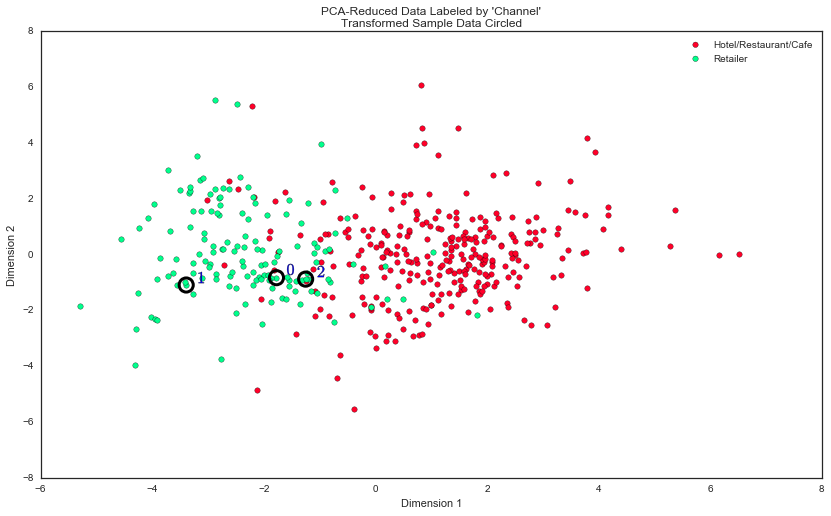

In [115]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  
<div style="background-color:#fff1e0;">This is close. Honestly, I didn't even look at the definition of the Channel variable until 1 minute ago when I first read this question. It is a bit relieving that the establishment types that I identified during my analysis are consistent with the Channel category groups. I called cluster 0 'restaurant-type establishments' and their Channel label is 'Hotel/Restaurant/Cafe.' I called cluster 1 'grocery store' or 'big retailer' and their Channel label is 'Retailer.' There is definitely a strong similarity between my graph further above (that leaves out Channel as a variable) and the graph directly above (that includes Channel as a variable). However, the division of the groups was stronger in my analysis. You can see above that there are some green dots on the 'red side' and there are some red dots on the 'green side.' It seems as though more information about the customers has revealed that businesses are not always as cut and dry as the wholesaler would like to think. However, by collecting more and more information on our customers we can get a better sense of what they need and how to service those needs optimally.</div>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.